In [1]:
import pandas as pd

df = pd.read_pickle('train.pkl')
df.head()

,index,マンション名,築年数,建物高さ,階,賃料,専有面積,地区:本駒込,地区:水道,地区:春日,...,間取りDK,間取りK,間取りL,間取りS,駅1,徒歩1,駅2,徒歩2,駅3,徒歩3
0,0,Ｋｍマンション,26,5,3,125000,44.95,1,0,0,...,1,0,1,0,368,6,99,15,404,17
1,1,ダイアパレス文京サファイアレジデンス,19,9,9,290000,73.26,0,1,0,...,1,0,1,0,661,6,412,10,191,12
2,2,ダイアパレス文京サファイアレジデンス,19,9,9,290000,73.26,0,1,0,...,1,0,1,0,661,6,412,10,191,12
3,3,本駒込シティハイツ,30,3,2,126000,54.81,1,0,0,...,1,0,0,0,365,6,622,7,404,9
4,4,本駒込シティハイツ,30,3,2,126000,54.81,1,0,0,...,1,0,0,0,365,6,622,7,404,9


In [2]:
import matplotlib.pyplot as plt

corr = df.drop('index', axis=1).drop('賃料', axis=1).drop('マンション名', axis=1).corr()
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

- 特に相関関係にありそうな項はない

# 重回帰

In [4]:
import numpy as np
import statsmodels.formula.api as smf

df.columns = [c.replace(':', '') for c in list(df.columns)]
columns = ' + '.join([c for c in list(df.columns) if c not in ['賃料', 'index', 'マンション名']])
lm = smf.ols('賃料 ~ ' + columns, data = df).fit()

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     賃料   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2501.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:12:59   Log-Likelihood:                -99657.
No. Observations:                8773   AIC:                         1.994e+05
Df Residuals:                    8739   BIC:                         1.996e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.406e+04   1119.923     12.553      0.000    1.19e+04    1.63e+04
築年数         -928.5758     16.476    -56.360      0.000    -960.872    -896.279
建物高さ        1508.2481     68.483     22.024      0.000    1374.005    1642.491
階           1558.7505     89.117     17.491      0.000    1384.060    1733.441
専有面積        2595.7319     30.744     84.431      0.000    2535.467    2655.997
地区本駒込      -8674.9801    743.673    -11.665      0.000   -1.01e+04   -7217.206
地区水道       -1703.6922   1096.450     -1.554      0.120   -3852.993     445.609
地区春日        4196.1203   1630.725      2.573      0.010     999.515    7392.725
地区千駄木      -2284.8921    858.799     -2.661      0.008   -3968.340    -601.444
地区本郷        3378.0920    738.082      4.577      0.000    1931.278    4824.906
地区湯島         494.7321    880.738      0.562      0.574   -1231.721    2221.185
地区小日向       2483.6455   1453.604      1.709      0.088    -365.760    5333.051
地区千石       -7512.5981    898.506     -8.361      0.000   -9273.882   -5751.315
地区小石川       7125.8816    959.258      7.429      0.000    5245.510    9006.253
地区向丘       -2283.9843   1226.646     -1.862      0.063   -4688.500     120.531
地区関口        4522.2410   1167.485      3.873      0.000    2233.695    6810.787
地区音羽       -8579.6393   1335.382     -6.425      0.000   -1.12e+04   -5961.975
地区根津        1651.4970   1648.739      1.002      0.317   -1580.419    4883.413
地区大塚       -1943.4457    779.107     -2.494      0.013   -3470.678    -416.213
地区白山       -4846.5211    873.884     -5.546      0.000   -6559.540   -3133.502
地区目白台       9188.3090   1707.334      5.382      0.000    5841.532    1.25e+04
地区西片       -3224.3518   1586.909     -2.032      0.042   -6335.067    -113.637
地区弥生        4405.3030   2704.497      1.629      0.103    -896.148    9706.754
地区後楽        1.767e+04   2556.956      6.909      0.000    1.27e+04    2.27e+04
初期費用           0.0081      0.001     14.569      0.000       0.007       0.009
部屋数          1.19e+04    708.537     16.789      0.000    1.05e+04    1.33e+04
間取りDK       7139.3805    774.317      9.220      0.000    5621.536    8657.225
間取りK        6918.9031    583.090     11.866      0.000    5775.909    8061.897
間取りL        1.686e+04    914.806     18.430      0.000    1.51e+04    1.87e+04
間取りS         718.5307   2017.467      0.356      0.722   -3236.181    4673.242
駅1             3.6582      1.445      2.532      0.011       0.826       6.491
徒歩1         -186.2419     88.277     -2.110      0.035    -359.285     -13.198
駅2             3.0413      1.291      2.357      0.018       0.512       5.571
徒歩2         -514.6051     75.706     -6.797      0.000    -663.007    -366.204
駅3             6.0455      1.566      3.860      0.000       2.975       9.116
徒歩3          110.5028     53.501      2.065      0.039       5.627     215.378
==

- 地区ごとの係数の違いが面白い
    - 係数の単位は円なので、文京区平均をゼロとして、他の条件が同じならめじろ台は9000円高くて、本駒込は8000円安い
- 初期費用が高いから家賃が安くなるとかいうことはない
- 部屋数が12000なので、同じ面積の部屋を2つに区切るだけで家賃が上がる
- 決定係数も 0.904 とそこそこ高い

In [6]:
from math import sqrt 

test = pd.read_pickle('test.pkl')
X_test = test.drop('index', axis=1).drop('賃料', axis=1).drop('マンション名', axis=1)
X_test.columns = [c.replace(':', '') for c in list(X_test.columns)]
Y_test = test['賃料']

y_hat = lm.predict(X_test)
rmse = sqrt(np.sum((Y_test - y_hat).to_numpy() ** 2) / len(Y_test))
rmse

22009.993333510094

# k-NN 回帰

In [7]:
X_train = df.drop('index', axis=1).drop('賃料', axis=1).drop('マンション名', axis=1)
Y_train = df['賃料']

test = pd.read_pickle('test.pkl')
X_test = test.drop('index', axis=1).drop('賃料', axis=1).drop('マンション名', axis=1)
Y_test = test['賃料']

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

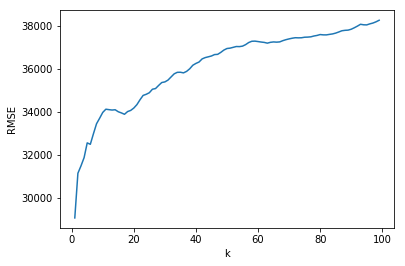

In [9]:
from sklearn.metrics import mean_squared_error

rmse_list = []

k_range = range(1, 100)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    rmse_list.append(sqrt(mean_squared_error(Y_test, Y_pred)))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, rmse_list)
ax.set_xlabel('k')
ax.set_ylabel('RMSE')
plt.show()

- k=1 の回帰が一番うまくいく = k-NN は向いていないかも

In [10]:
min(rmse_list)

29051.886403467848

# 3次スプライン

In [11]:
from pygam import LinearGAM

gam = LinearGAM().fit(X_train, Y_train)

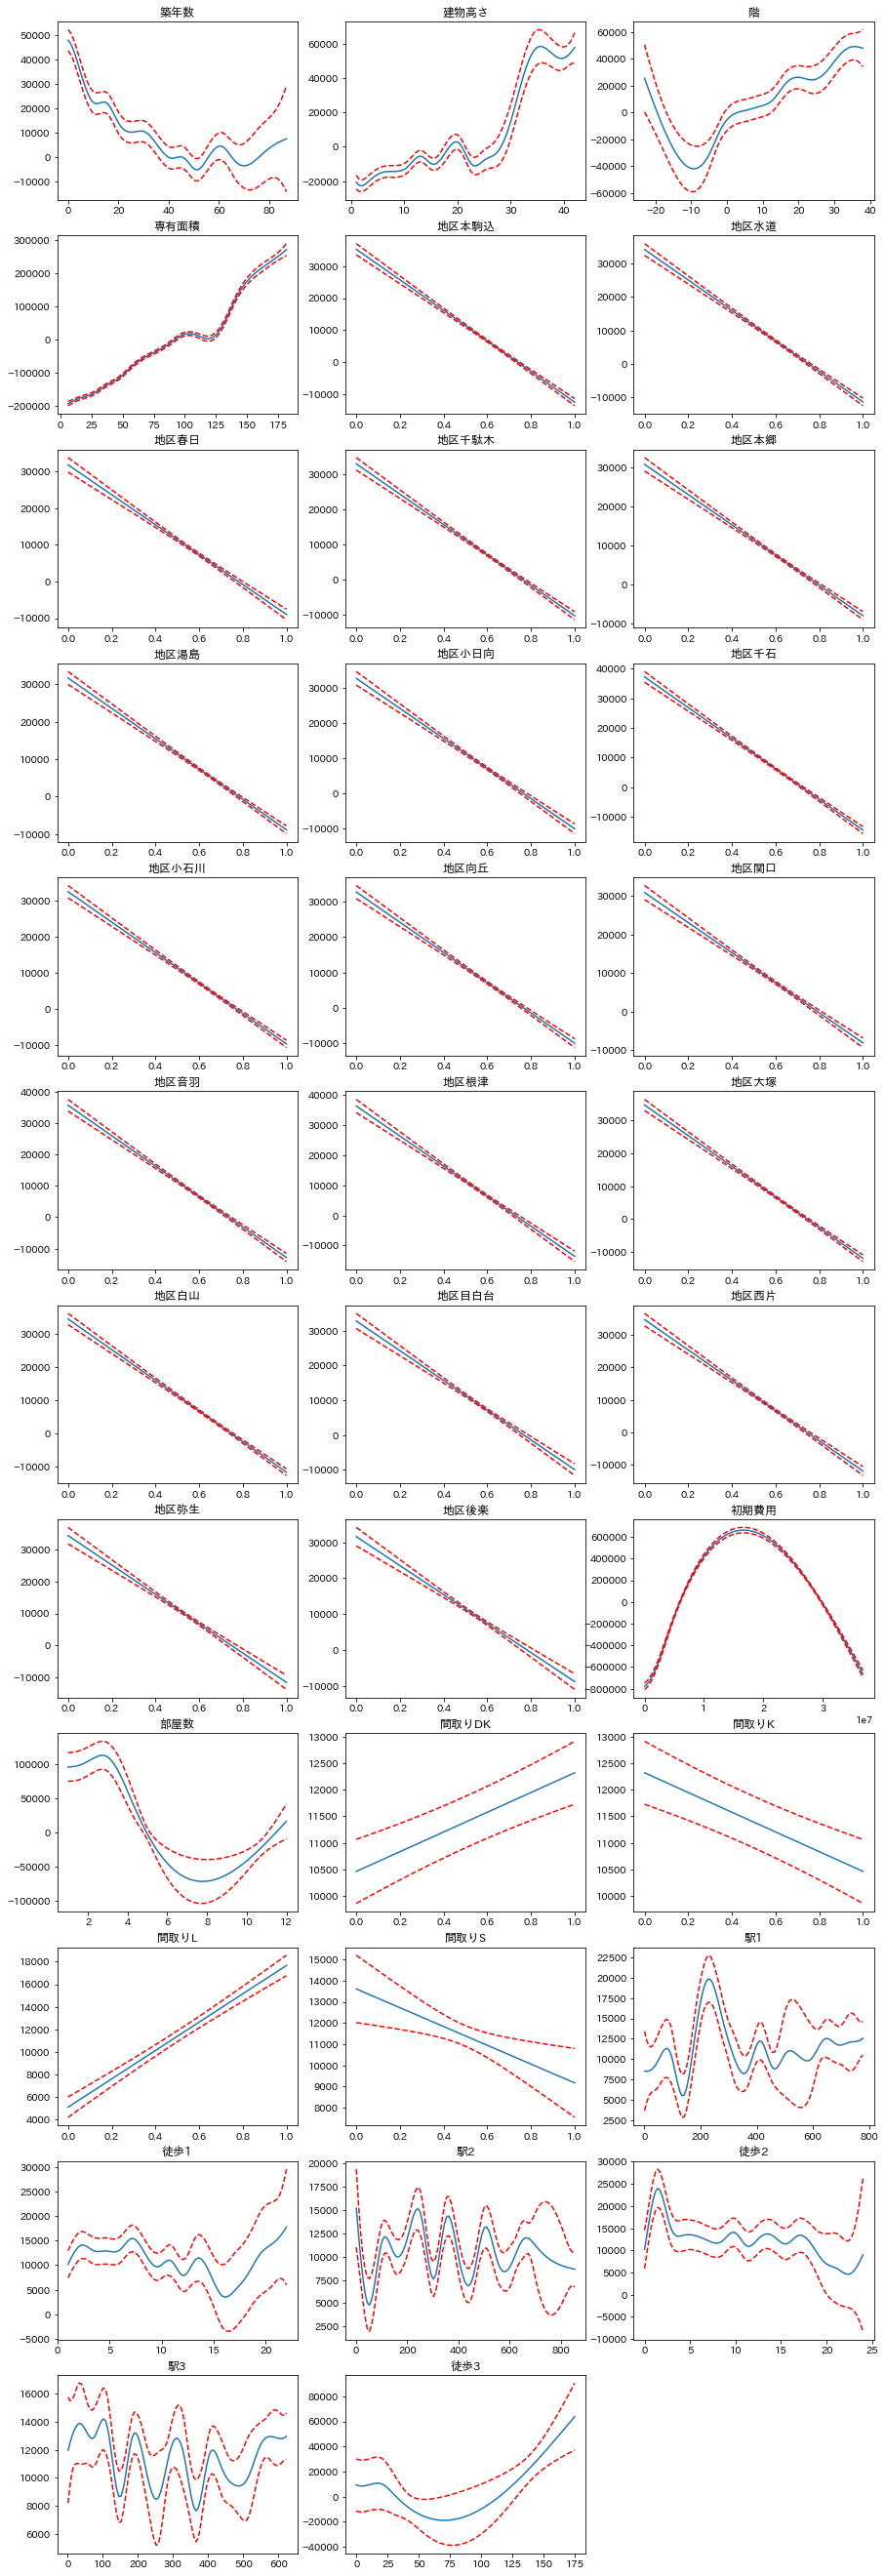

In [12]:
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(15,80))
for i in range(X_train.shape[1]):
    plt.subplot(20,3,i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i],gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1],
                c='r', ls='--')
    plt.title(X_train.columns[i])
plt.show()

スプラインの場合、各変数の影響がよくわかる

- 端のデータはサンプル数が少なく、うまく回帰できていない
    - 築年数は40年までは急激に落ちるが、その後はあまり変わらない
    - 高階のマンションでは30階をすぎると急激に価格が上がる
    - 部屋数が5部屋以上で下がっているように見えるが、これは部屋数が多いのに安いデータに影響されているのかもしれない
        - 12部屋で46万という部屋が2件あった。多分これの影響
- 地上階より地下階のほうが家賃が安いとした仮定が正しかった
- 地下23階という入力ミスでかなり端がぶれている。スプラインは回帰に弱く、入力ミスの多いsuumoのデータには向かないかも。


In [13]:
y_hat = gam.predict(X_test)

rmse = sqrt(np.sum((Y_test.to_numpy() - y_hat) ** 2) / len(Y_test))
rmse

17178.95391261946

# LightGBM

In [14]:
import lightgbm as lgb

/Users/d6ms/dev/miniconda3/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [15]:
def compute_lgbm(X_train, X_test, Y_train, Y_test):
    X_train.columns = [str(i) for i in range(len(X_train.columns))]
    X_test.columns = [str(i) for i in range(len(X_test.columns))]
    Y_train.name = ''
    Y_test.name = ''


    params={'random_state' : 1, 'objective': 'rmse'}
    dtrain = lgb.Dataset(X_train, label=Y_train)
    dvalid = lgb.Dataset(X_test, label=Y_test)
    bst = lgb.train(params, dtrain, num_boost_round=1000,valid_sets=[dtrain,dvalid],early_stopping_rounds=50,verbose_eval=10)

compute_lgbm(X_train, X_test, Y_train, Y_test)

Training until validation scores don't improve for 50 rounds
[10]	training's rmse: 28084.4	valid_1's rmse: 32052.8
[20]	training's rmse: 15784.4	valid_1's rmse: 19877.7
[30]	training's rmse: 12296.2	valid_1's rmse: 16459.2
[40]	training's rmse: 11040.9	valid_1's rmse: 15361.2
[50]	training's rmse: 10312.3	valid_1's rmse: 15051.7
[60]	training's rmse: 9812.4	valid_1's rmse: 14835.4
[70]	training's rmse: 9400.18	valid_1's rmse: 14627.1
[80]	training's rmse: 9032.02	valid_1's rmse: 14542.7
[90]	training's rmse: 8750.39	valid_1's rmse: 14503
[100]	training's rmse: 8434.07	valid_1's rmse: 14495.6
[110]	training's rmse: 8185.67	valid_1's rmse: 14505.6
[120]	training's rmse: 7924.32	valid_1's rmse: 14521.5
[130]	training's rmse: 7722.92	valid_1's rmse: 14510.9
[140]	training's rmse: 7533.59	valid_1's rmse: 14395.3
[150]	training's rmse: 7346.88	valid_1's rmse: 14274.3
[160]	training's rmse: 7187.15	valid_1's rmse: 14173.6
[170]	training's rmse: 7017.28	valid_1's rmse: 14153.4
[180]	training's

- 性能はよいが、説明可能性に欠ける